In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path='Objective_Function/objective_'

df_fixed_evs_diag = pd.read_csv(file_path+'Fixed_EVs_DIAG.csv')
df_fixed_pvs_diag = pd.read_csv(file_path+'Fixed_PVs_DIAG.csv')
df_mixed_diag =  pd.read_csv(file_path+'mixed_DIAG.csv')

In [3]:
df_all = [ df_mixed_diag , df_fixed_evs_diag, df_fixed_pvs_diag]
data_order=['Mixed','Fixed_EVs', 'Fixed_PVs']

In [4]:
DAs_dict = dict()
for i in range(10):
    DAs_dict[str(i)] = "DA"+str(i)

#Rename Columns
for df in df_all:
    df.rename(columns=DAs_dict, inplace=True)
    
# Drop First row
for df in df_all:
    df = df.iloc[1:]

In [5]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        

# Comparing Algorithms results for three scenario in one place

C:\ProgramData\Anaconda3\envs\pyod2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


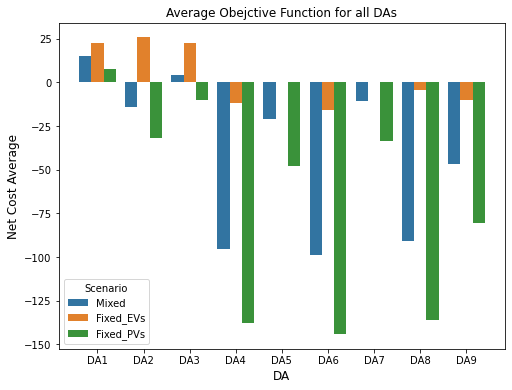

In [6]:
count=0
DA=[]
Scenario =[] 
Obj_Mean =[]

for df in df_all:
    for X in zip(df.mean().index, df.mean()):
        DA.append(X[0])
        Scenario.append(data_order[count])
        Obj_Mean.append(X[1])
    count+=1   
df_compare = pd.DataFrame({'Scenario':Scenario, 'DA':DA, 'Mean':Obj_Mean,})

#******************************************************************************
#***************** Plot Data **************************************************

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(data= df_compare, x='DA',y='Mean' ,hue='Scenario', ax=ax);

ax.set_title('Average Obejctive Function for all DAs', fontsize=12)
ax.set_xlabel('DA',fontsize=12);
ax.set_ylabel('Net Cost Average',fontsize=12);

ax.plot()

ax.set_rasterized(True)
fig.savefig("Figures_Objective/Average_objective_function_ALL_Scenarios.png", bbox_inches= 'tight', dpi=200)

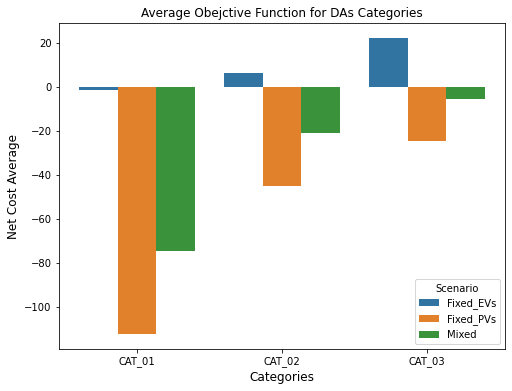

In [7]:
# Plot Based On Category
DAs_dict = dict()
for i in range(1,10):
    if i % 2 == 0:
        DAs_dict['DA'+str(i)] = 'CAT_01'
    elif i % 3 == 0:
        DAs_dict['DA'+str(i)] = 'CAT_02'
    else:
        DAs_dict['DA'+str(i)] = 'CAT_03'


for key, value in DAs_dict.items():
    df_compare.loc[df_compare['DA'] == key, 'DA'] = value

#****************************************
#********** Take Mean For Categories ****

df_compare = df_compare.groupby(['DA','Scenario']).mean().reset_index()


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(data= df_compare, x='DA',y='Mean' ,hue='Scenario', ax=ax);

ax.set_title('Average Obejctive Function for DAs Categories', fontsize=12)
ax.set_xlabel('Categories',fontsize=12);
ax.set_ylabel('Net Cost Average',fontsize=12);

ax.plot()

ax.set_rasterized(True)
fig.savefig("Figures_Objective/Average_objective_function_ALL_Categories.png", bbox_inches= 'tight', dpi=200)

In [8]:
df_fixed_pvs_diag

DA1        DA2        DA3         DA4        DA5         DA6  \
0    74.768675  77.587755  77.429679   78.754746  78.370442   75.428905   
1    66.952734  62.728029  67.190041   63.795073  72.578290   61.939612   
2    61.181245  53.023796  59.323695   67.190226  70.961446   63.814899   
3    47.017158  11.761917  28.978328  -25.245150  20.891888  -26.611461   
4    34.713101  12.059797  27.409328  -29.665419  17.456834  -33.166088   
..         ...        ...        ...         ...        ...         ...   
296  13.601664 -30.226506  -3.153133 -132.255008 -49.622628 -138.358594   
297   2.364261 -37.461283 -15.384559 -148.493273 -50.464889 -156.753249   
298   7.780686 -23.148037  -6.640774 -135.174031 -50.196458 -137.136474   
299   3.317924 -38.277673 -16.185989 -148.592890 -50.501023 -155.272949   
300  15.205078 -26.133263  -0.561520 -130.601276 -46.657093 -137.238639   

           DA7         DA8        DA9  
0    77.723554   76.294503  77.417553  
1    75.934703   63.766378  65.275209  
2    71.692792   65.295187  68.274603  
3    23.914235  -30.338809  -2.556092  
4    21.447894  -26.878875  -0.106304  
..         ...         ...        ...  
296 -31.558136 -133.832329 -78.623726  
297 -38.706204 -144.917049 -87.119458  
298 -31.953132 -138.042010 -79.646339  
299 -38.698156 -144.939140 -86.897200  
300 -28.176650 -133.850797 -75.370435  

[301 rows x 9 columns]

# Last Iteration

<AxesSubplot:xlabel='Iteration', ylabel='Net Cost'>

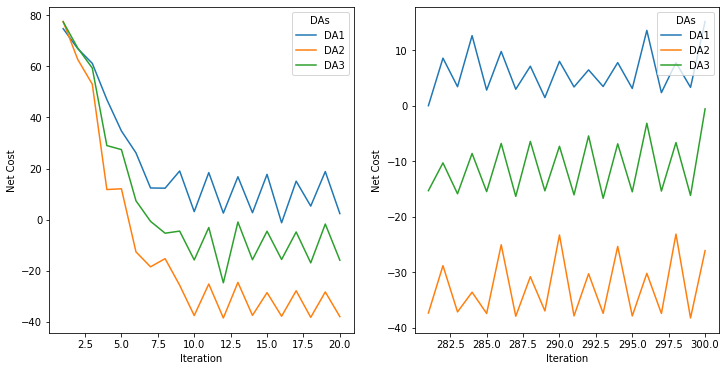

In [37]:
# head_tail_slice = list(range(10))+list(range(-10,0))
# df_fixed_pvs_diag[['DA1', 'DA2', 'DA3']].iloc[head_tail_slice]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

first_iter=20
x_range = [x for x in range(1,1+first_iter)]
X_range =[*x_range, *x_range, *x_range]
df_compare= df[['DA1', 'DA2', 'DA3']][:first_iter]
df_compare=df_compare.melt(var_name='DAs', value_name='Net Cost')
df_compare['Iteration'] = X_range
sns.lineplot(data=df_compare, x='Iteration', y='Net Cost', hue='DAs', ax=axes[0])

last_iter = 20
x_range = [x for x in range(301-last_iter,301)]
X_range =[*x_range, *x_range, *x_range]
df_compare= df[['DA1', 'DA2', 'DA3']][-last_iter:]
df_compare=df_compare.melt(var_name='DAs', value_name='Net Cost')
df_compare['Iteration'] = X_range
sns.lineplot(data=df_compare, x='Iteration', y='Net Cost', hue='DAs', ax=axes[1])





In [32]:
first_iter=10
x_range = [x for x in range(1,1+first_iter)]

In [34]:
x_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]